In [9]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

In [10]:
from typing import Tuple

import numpy as np
import pandas as pd

from statsmodels.graphics import tsaplots
from load_dataset import Dataset
import matplotlib.pyplot as plt
import plotting

from statsmodels.tsa.stattools import adfuller

In [11]:
from statsmodels.stats import diagnostic


In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [13]:
from statsmodels.tsa import arima_model


In [14]:
dataset = Dataset('../data/dataset/')

In [35]:
from plotting import plot_ts


# Задание 1. 
(2 балла) Используя подход box-jenkins постройте модель ARIMA
(statsmodels.tsa.arima_model) для временного ряда dow_jones_0.
Сделайте прогноз на 30 точек вперед. Интерпретируйте
полученный результат. 

In [15]:
dj = dataset['dow_jones_0.csv']

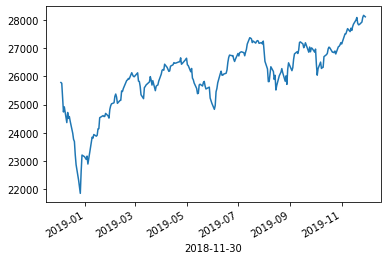

In [16]:
dj.plot()

Видим, что ряд нестацонарен, и что дифференцирование ряда должно, по идее привести его к стационарности. 

In [17]:
dj_diff = dj.diff()

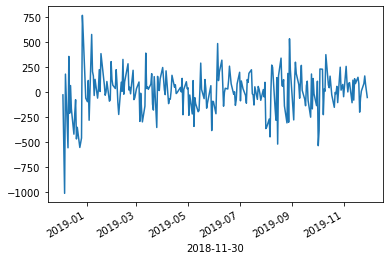

In [18]:
dj_diff.plot()

В целом похоже на стациноарный ряд с некоторыми выборосами в начале датасета

In [19]:
p_value = adfuller(dj_diff.dropna())[1]
p_value

7.270680965724108e-27

Критерий Дики-Фулера позволяет отбросить нулевую гипотезу, что ряд нестационарен.

Сезонности не наблюдается

In [20]:
d = 1
D = 0

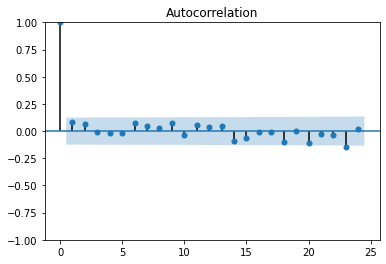

In [21]:
plot_acf(dj_diff.dropna());


/Users/dmitry/bin/miniconda2/miniconda2/envs/py3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


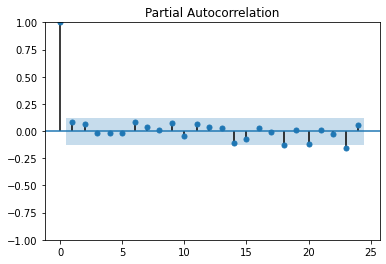

In [22]:
plot_pacf(dj_diff.dropna());

Мы видим, что на обоих графиках резкое падение, значит модели либо неразделимы и подход Бокса-Дженкинса неприменим, либо модель является случайным шумом (ARMA(0, 0)). Учитывая. что данный временной ряд являестя индексом биржи, что можно рассматривать как приближение к случайному блужданию, делаем вывод, что в данному случае применима ARMA(0, 0) 

In [56]:
from statsmodels.tsa.arima.model import ARIMA

In [49]:
mod = ARIMA(dj, order=(0,1,0) )

/Users/dmitry/bin/miniconda2/miniconda2/envs/py3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/dmitry/bin/miniconda2/miniconda2/envs/py3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/dmitry/bin/miniconda2/miniconda2/envs/py3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [50]:
res = mod.fit()

In [51]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           25307.140625   No. Observations:                  250
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1683.288
Date:                Mon, 11 Oct 2021   AIC                           3368.576
Time:                        21:59:18   BIC                           3372.093
Sample:                             0   HQIC                          3369.992
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.359e+04   2522.586     17.279      0.000    3.86e+04    4.85e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.70   Jarque-Bera (JB):                97.78
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                            -0.51
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
preds = res.forecast(30)

/Users/dmitry/bin/miniconda2/miniconda2/envs/py3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [53]:
preds

250    28103.199219
251    28103.199219
252    28103.199219
253    28103.199219
254    28103.199219
255    28103.199219
256    28103.199219
257    28103.199219
258    28103.199219
259    28103.199219
260    28103.199219
261    28103.199219
262    28103.199219
263    28103.199219
264    28103.199219
265    28103.199219
266    28103.199219
267    28103.199219
268    28103.199219
269    28103.199219
270    28103.199219
271    28103.199219
272    28103.199219
273    28103.199219
274    28103.199219
275    28103.199219
276    28103.199219
277    28103.199219
278    28103.199219
279    28103.199219
Name: predicted_mean, dtype: float64

In [54]:
plot_ts(dj.reset_index(drop=True), preds)

Loading BokehJS ...

Модель предсказала константу на уровне последнего значения. Види